In [1]:
from covid_lib import read_covid_data
import numpy as np
import matplotlib.pyplot as plt

from aidam.math_utils import lag_correlation_ext
from scipy.stats import pearsonr
from aidam.aicharts import plotyy

## Lettura e preprocessing dati

In [2]:
trend,regioni,giorni,giorno_settimana,popolazione,day_counter=read_covid_data('stored_data.pkl')

Giorni osservati: 272
Primo giorno: 2020-02-24T18:00:00
Ultimo giorno: 2020-11-21T17:00:00


## Calcolo LAG correlation

In [3]:
max_delay=60
delays=list(range(0,max_delay))

x_name_list=['perc_tamponi_positivi']
y_name='terapia_intensiva'


y=trend[y_name]['Italia']


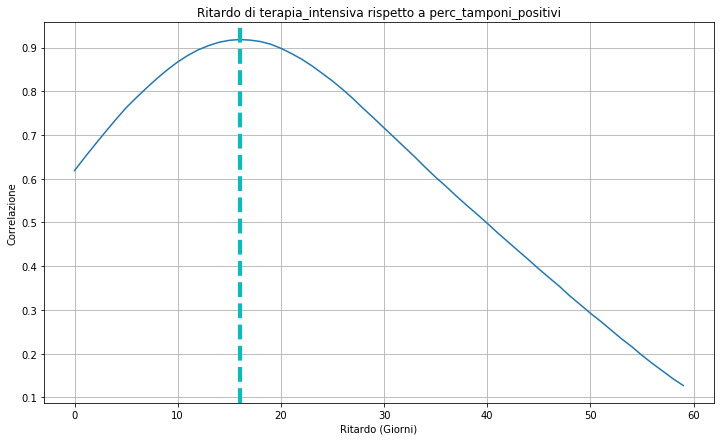

In [4]:
for x_name in x_name_list:
    x=trend[x_name]['Italia']
    if x_name=='perc_tamponi_positivi':
        x[0]=x[1]
    corrs,betas=lag_correlation_ext(x,y,delays,corr_fun=pearsonr)
    max_point=np.argmax(corrs)
    
    fig,ax=plt.subplots(1,figsize=(12,7))
    ax.plot(delays,corrs,label='Correlazione')
    ax.grid()
    ax.set_xlabel('Ritardo (Giorni)')
    ax.set_ylabel('Correlazione')
    ax.set_title('Ritardo di %s rispetto a %s'%(y_name,x_name))
    ax.axvline(x=max_point,c='c', linewidth=4,ls='--')

In [5]:
y

array([  0.,   3.,   2.,   5.,   4.,   8.,   5.,  18.,  27.,  28.,  41.,
        49.,  36., 133.,  97., 168., 196., 189., 250., 175., 368., 349.,
       345., 475., 427., 627., 793., 651., 601., 743., 683., 662., 969.,
       889., 756., 812., 837., 727., 760., 766., 681., 525., 636., 604.,
       542., 610., 570., 619., 431., 566., 602., 578., 525., 575., 482.,
       433., 454., 534., 437., 464., 420., 415., 260., 333., 382., 323.,
       285., 269., 474., 174., 195., 236., 369., 274., 243., 194., 165.,
       179., 172., 195., 262., 242., 153., 145.,  99., 162., 161., 156.,
       130., 119.,  50.,  92.,  78., 117.,  70.,  87., 111.,  75.,  60.,
        55.,  71.,  88.,  85.,  72.,  53.,  65.,  79.,  71.,  53.,  56.,
        78.,  44.,  26.,  34.,  43.,  66.,  47.,  49.,  24.,  23.,  18.,
       -31.,  34.,  30.,   8.,  22.,   6.,  23.,  21.,  30.,  15.,  21.,
         7.,   8.,  30.,  15.,  12.,  12.,   7.,   9.,  13.,  17.,  13.,
        20.,  11.,  14.,   3.,  13.,  15.,   9.,  1